# Part 2

## Large-scale data analysis with spaCy

In this part, you'll use your new skills to extract specific information from large volumes of text. You'll learn how to make the most of spaCy's data structures, and how to effectively combine statistical and rule-based approaches for text analysis.


## A. Data Structures (1): Vocab, Lexemes and StringStore

### Shared vocab and string store (1)

spaCy stores all shared data in a vocabulary, the Vocab.
This includes words, but also the labels schemes for tags and entities.
To save memory, all strings are encoded to hash IDs. If a word occurs more than once, we don't need to save it every time.

- ```Vocab``` : stores data shared across multiple documents
- To save memory, spaCy encodes all strings to **hash values**
- Strings are only stored once in the ```StringStore``` via ```nlp.vocab.strings```
- String store: **lookup table** in both directions

In [ ]:
nlp.vocab.strings.add("coffee")
coffee_hash = nlp.vocab.strings["coffee"]
coffee_string = nlp.vocab.strings[coffee_hash]

- Hashes can't be reversed – that's why we need to provide the shared vocab

In [ ]:
# Raises an error if we haven't seen the string before
string = nlp.vocab.strings[3197928453018144401]

To get the hash for a string, we can look it up in `nlp.vocab.strings`.

To get the string representation of a hash, we can look up the hash.

A `Doc` object also exposes its vocab and strings.


- Look up the string and hash in `nlp.vocab.strings`

In [ ]:
doc = nlp("I love coffee")
print("hash value:", nlp.vocab.strings["coffee"])
print("string value:", nlp.vocab.strings[3197928453018144401])

- The ```doc``` also exposes the vocab and strings

In [ ]:
doc = nlp("I love coffee")
print("hash value:", doc.vocab.strings["coffee"])


### Lexemes: entries in the vocabulary

Lexemes are context-independent entries in the vocabulary.

You can get a lexeme by looking up a string or a hash ID in the vocab.

Lexemes expose attributes, just like tokens.

They hold context-independent information about a word, like the text, or whether the word consists of alphabetic characters.

Lexemes don't have part-of-speech tags, dependencies or entity labels. Those depend on the context.


- A ```Lexeme``` object is an entry in the vocabulary

In [ ]:
doc = nlp("I love coffee")
lexeme = nlp.vocab["coffee"]

# Print the lexical attributes
print(lexeme.text, lexeme.orth, lexeme.is_alpha)

- Contains the **context-independent** information about a word
    - Word text: ```lexeme.text``` and ```lexeme.orth``` (the hash)
    - Lexical attributes like ```lexeme.is_alpha```
    - **Not** context-dependent part-of-speech tags, dependencies or entity labels


### Vocab, hashes and lexemes

The Doc contains words in context – in this case, the tokens "Ines", "nage" and "souvent" with their part-of-speech tags and dependencies.

Each token refers to a lexeme, which knows the word's hash ID. To get the string representation of the word, spaCy looks up the hash in the string store.


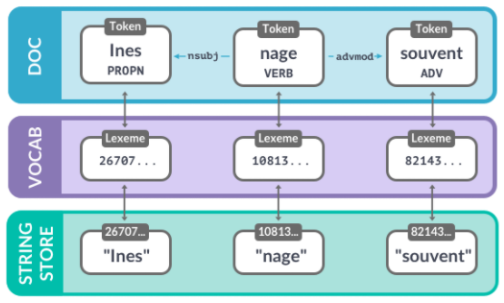

## B. Strings to hashes

#### Part 1

- Look up the string “cat” in ```nlp.vocab.strings``` to get the hash.
- Look up the hash to get back the string.

In [ ]:
import spacy

nlp = spacy.blank("en")
doc = nlp("I have a cat")

# Look up the hash for the word "cat"
cat_hash = ____.____.____[____]
print(cat_hash)

# Look up the cat_hash to get the string
cat_string = ____.____.____[____]
print(cat_string)

#### Part 2

- Look up the string label “PERSON” in ```nlp.vocab.strings``` to get the hash.
- Look up the hash to get back the string.


In [ ]:
import spacy

nlp = spacy.blank("en")
doc = nlp("David Bowie is a PERSON")

# Look up the hash for the string label "PERSON"
person_hash = ____.____.____[____]
print(person_hash)

# Look up the person_hash to get the string
person_string = ____.____.____[____]
print(person_string)

## C. Data Structures (2): Doc, Span and Token


### The Doc object

The `Doc` is one of the central data structures in spaCy. It's created automatically when you process a text with the `nlp` object. But you can also instantiate the class manually.

After creating the `nlp` object, we can import the `Doc` class from `spacy.tokens`.

Here we're creating a doc from three words. The spaces are a list of boolean values indicating whether the word is followed by a space. Every token includes that information – even the last one!

The `Doc` class takes three arguments: the shared vocab, the words and the spaces.

In [4]:
# Create an nlp object
import spacy
nlp = spacy.blank("en")

# Import the Doc class
from spacy.tokens import Doc

# The words and spaces to create the doc from
words = ["Hello", "world", "!"]
spaces = [True, False, False]

# Create a doc manually
doc = Doc(nlp.vocab, words=words, spaces=spaces)

### The Span object

A `Span` is a slice of a doc consisting of one or more tokens. The `Span` takes at least three arguments: the doc it refers to, and the start and end index of the span. Remember that the end index is exclusive!

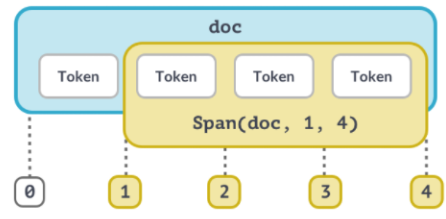

To create a `Span` manually, we can also import the class from `spacy.tokens`. We can then instantiate it with the doc and the span's start and end index, and an optional label argument.

The `doc.ents` are writable, so we can add entities manually by overwriting it with a list of spans.


In [5]:
# Import the Doc and Span classes
from spacy.tokens import Doc, Span

# The words and spaces to create the doc from
words = ["Hello", "world", "!"]
spaces = [True, False, False]

# Create a doc manually
doc = Doc(nlp.vocab, words=words, spaces=spaces)

# Create a span manually
span = Span(doc, 0, 2)

# Create a span with a label
span_with_label = Span(doc, 0, 2, label="GREETING")

# Add span to the doc.ents
doc.ents = [span_with_label]

### Best practices

- ```Doc``` and ```Span``` are very powerful and hold references and relationships of words and sentences
    - **Convert result to strings as late as possible**
    - **Use token attributes if available** – for example, ```token.i``` for the token index
- Don't forget to pass in the shared ```vocab```

## D. Creating a Doc:

Let’s create some ```Doc``` objects from scratch!

#### Part 1

- Import the ```Doc``` from ```spacy.tokens```.
- Create a ```Doc``` from the ```words``` and ```spaces```. Don’t forget to pass in the vocab!


In [ ]:
import spacy

nlp = spacy.blank("en")

# Import the Doc class
from ____ import ____

# Desired text: "spaCy is cool!"
words = ["spaCy", "is", "cool", "!"]
spaces = [True, True, False, False]

# Create a Doc from the words and spaces
doc = ____(____, words=words, spaces=spaces)
print(doc.text)

#### Part 2

- Import the ```Doc``` from ```spacy.tokens```.
- Create a ```Doc``` from the ```words``` and ```spaces```. Don’t forget to pass in the vocab!

In [ ]:
import spacy

nlp = spacy.blank("en")

# Import the Doc class
from ____ import ____

# Desired text: "Go, get started!"
words = ["Go", ",", "get", "started", "!"]
spaces = [____, ____, ____, ____, ____]

# Create a Doc from the words and spaces
doc = ____(____, ____=____, ____=____)
print(doc.text)

#### Part 3

- Import the ```Doc``` from ```spacy.tokens```.
- Complete the ```words``` and ```spaces``` to match the desired text and create a ```doc```.

In [ ]:
import spacy

nlp = spacy.blank("en")

# Import the Doc class
from ____ import ____

# Desired text: "Oh, really?!"
words = [____, ____, ____, ____, ____]
spaces = [____, ____, ____, ____, ____]

# Create a Doc from the words and spaces
doc = ____(____, ____=____, ____=____)
print(doc.text)

## E. Docs, spans and entities from scratch

In this exercise, you’ll create the `Doc` and `Span` objects manually, and update the named entities – just like spaCy does behind the scenes. A shared `nlp` object has already been created.

- Import the `Doc` and `Span` classes from `spacy.tokens`.
- Use the `Doc` class directly to create a `doc` from the words and spaces.
- Create a `Span` for “David Bowie” from the `doc` and assign it the label `"PERSON"`.
- Overwrite the `doc.ents` with a list of one entity, the “David Bowie” `span`.

In [ ]:
import spacy

nlp = spacy.blank("en")

# Import the Doc and Span classes
from spacy.____ import ____, ____

words = ["I", "like", "David", "Bowie"]
spaces = [True, True, True, False]

# Create a doc from the words and spaces
doc = ____(____, ____, ____)
print(doc.text)

# Create a span for "David Bowie" from the doc and assign it the label "PERSON"
span = ____(____, ____, ____, label=____)
print(span.text, span.label_)

# Add the span to the doc's entities
____.____ = [____]

# Print entities' text and labels
print([(ent.text, ent.label_) for ent in doc.ents])

## F. Data structures best practices

The code in this example is trying to analyze a text and collect all proper nouns that are followed by a verb.

In [ ]:
import spacy

nlp = spacy.load("en_core_web_sm")
doc = nlp("Berlin looks like a nice city")

# Get all tokens and part-of-speech tags
token_texts = [token.text for token in doc]
pos_tags = [token.pos_ for token in doc]

for index, pos in enumerate(pos_tags):
    # Check if the current token is a proper noun
    if pos == "PROPN":
        # Check if the next token is a verb
        if pos_tags[index + 1] == "VERB":
            result = token_texts[index]
            print("Found proper noun before a verb:", result)

#### Part 1

Why is the code bad?

    It only uses lists of strings instead of native token attributes.
    This is often less efficient, and can't express complex relationships.
    Always convert the results to strings as late as possible, and try to use native token attributes to keep things consistent.

#### Part 2

- Rewrite the code to use the native token attributes instead of lists of  ```token_texts``` and ```pos_tags```.
- Loop over each `token` in the `doc` and check the `token.pos_` attribute.
- Use `doc[token.i + 1]` to check for the next token and its `.pos_` attribute.
- If a proper noun before a verb is found, print its `token.text`.

In [ ]:
import spacy

nlp = spacy.load("en_core_web_sm")
doc = nlp("Berlin looks like a nice city")

# Get all tokens and part-of-speech tags
token_texts = [token.text for token in doc]
pos_tags = [token.pos_ for token in doc]

for index, pos in enumerate(pos_tags):
    # Check if the current token is a proper noun
    if pos == "PROPN":
        # Check if the next token is a verb
        if pos_tags[index + 1] == "VERB":
            result = token_texts[index]
            print("Found proper noun before a verb:", result)

## G. Word vectors and semantic similarity

### Comparing semantic similarity

spaCy can compare two objects and predict how similar they are – for example, documents, spans or single tokens.

The `Doc`, `Token` and `Span` objects have a `.similarity` method that takes another object and returns a floating point number between 0 and 1, indicating how similar they are.

One thing that's very important: In order to use similarity, you need a larger spaCy pipeline that has word vectors included.

- `spaCy` can compare two objects and predict similarity
- `Doc.similarity()`, `Span.similarity()` and `Token.similarity()`
- Take another object and return a similarity score (`0` to `1`)
- **Important:** needs a pipeline that has word vectors included, for example:
    - ✅ `en_core_web_md` (medium)
    - ✅ `en_core_web_lg` (large)
    - 🚫 **NOT** `en_core_web_sm` (small)

### Similarity examples (1)

Here's an example. Let's say we want to find out whether two documents are similar.

First, we load the medium English pipeline, "en_core_web_md".

We can then create two doc objects and use the first doc's `similarity` method to compare it to the second.

Here, a fairly high similarity score of 0.86 is predicted for "I like fast food" and "I like pizza".

The same works for tokens.

According to the word vectors, the tokens "pizza" and "pasta" are kind of similar, and receive a score of 0.7.


In [ ]:
# Load a larger pipeline with vectors
nlp = spacy.load("en_core_web_md")

# Compare two documents
doc1 = nlp("I like fast food")
doc2 = nlp("I like pizza")
print(doc1.similarity(doc2))

In [ ]:
# Compare two tokens
doc = nlp("I like pizza and pasta")
token1 = doc[2]
token2 = doc[4]
print(token1.similarity(token2))

You can also use the `similarity` methods to compare different types of objects.

For example, a document and a token.

Here, the similarity score is pretty low and the two objects are considered fairly dissimilar.

Here's another example comparing a span – "pizza and pasta" – to a document about McDonalds.

The score returned here is 0.61, so it's determined to be kind of similar.

In [ ]:
# Compare a document with a token
doc = nlp("I like pizza")
token = nlp("soap")[0]

print(doc.similarity(token))

In [ ]:
# Compare a span with a document
span = nlp("I like pizza and pasta")[2:5]
doc = nlp("McDonalds sells burgers")

print(span.similarity(doc))

### How does spaCy predict similarity?

Similarity is determined using word vectors, multi-dimensional representations of meanings of words.

You might have heard of Word2Vec, which is an algorithm that's often used to train word vectors from raw text.

Vectors can be added to spaCy's pipelines.

By default, the similarity returned by spaCy is the cosine similarity between two vectors – but this can be adjusted if necessary.

Vectors for objects consisting of several tokens, like the `Doc` and `Span`, default to the average of their token vectors.

That's also why you usually get more value out of shorter phrases with fewer irrelevant words.

- Similarity is determined using **word vectors**
- Multi-dimensional meaning representations of words
- Generated using an algorithm like [Word2Vec](https://en.wikipedia.org/wiki/Word2ve) and lots of text
- Can be added to spaCy's pipelines
- Default: cosine similarity, but can be adjusted
- ```Doc``` and ```Span``` vectors default to average of token vectors
- Short phrases are better than long documents with many irrelevant words

### Word vectors in spaCy

To give you an idea of what those vectors look like, here's an example.

First, we load the medium pipeline again, which ships with word vectors.

Next, we can process a text and look up a token's vector using the `.vector` attribute.

The result is a 300-dimensional vector of the word "banana".

In [ ]:
# Load a larger pipeline with vectors
nlp = spacy.load("en_core_web_md")

doc = nlp("I have a banana")
# Access the vector via the token.vector attribute
print(doc[3].vector)

### Similarity depends on the application context

It's important to keep in mind that there's no objective definition of what's similar and what isn't. It always depends on the context and what your application needs to do.

- Useful for many applications: recommendation systems, flagging duplicates etc.
- There's no objective definition of "similarity"
- Depends on the context and what application needs to do

Here's an example: spaCy's default word vectors assign a very high similarity score to "I like cats" and "I hate cats". This makes sense, because both texts express sentiment about cats. But in a different application context, you might want to consider the phrases as very dissimilar, because they talk about opposite sentiments.

In [ ]:
doc1 = nlp("I like cats")
doc2 = nlp("I hate cats")

print(doc1.similarity(doc2))

## H. Inspecting word vectors

In this exercise, you’ll use a larger English pipeline, which includes around 20.000 word vectors.

- Load the medium `"en_core_web_md"` pipeline with word vectors.
- Print the vector for `"bananas"` using the `token.vector` attribute.

In [ ]:
import spacy

# Load the en_core_web_md pipeline
nlp = ____

# Process a text
doc = nlp("Two bananas in pyjamas")

# Get the vector for the token "bananas"
bananas_vector = ____.____
print(bananas_vector)

## I. Comparing similarities

In this exercise, you’ll be using spaCy’s `similarity` methods to compare `Doc`, `Token` and `Span` objects and get similarity scores.

#### Part 1

- Use the `doc.similarity` method to compare `doc1` to `doc2` and print the result.

In [ ]:
import spacy

nlp = spacy.load("en_core_web_md")

doc1 = nlp("It's a warm summer day")
doc2 = nlp("It's sunny outside")

# Get the similarity of doc1 and doc2
similarity = ____.____(____)
print(similarity)

#### Part 2

- Use the `token.similarity` method to compare `token1` to `token2` and print the result.

In [ ]:
import spacy

nlp = spacy.load("en_core_web_md")

doc = nlp("TV and books")
token1, token2 = doc[0], doc[2]

# Get the similarity of the tokens "TV" and "books"
similarity = ____.____(____)
print(similarity)

#### Part 3

- Create spans for “great restaurant”/“really nice bar”.
- Use `span.similarity` to compare them and print the result.

In [ ]:
import spacy

nlp = spacy.load("en_core_web_md")

doc = nlp("This was a great restaurant. Afterwards, we went to a really nice bar.")

# Create spans for "great restaurant" and "really nice bar"
span1 = ____
span2 = ____

# Get the similarity of the spans
similarity = ____.____(____)
print(similarity)

## J. Combining predictions and rules

### Statistical predictions vs. rules

Statistical models are useful if your application needs to be able to generalize based on a few examples.

For instance, detecting product or person names usually benefits from a trained model. Instead of providing a list of all person names ever, your application will be able to predict whether a span of tokens is a person name. Similarly, you can predict dependency labels to find subject/object relationships.

To do this, you would use spaCy's entity recognizer, dependency parser or part-of-speech tagger.

Rule-based approaches on the other hand come in handy if there's a more or less finite number of instances you want to find. For example, all countries or cities of the world, drug names or even dog breeds.

In spaCy, you can achieve this with custom tokenization rules, as well as the matcher and phrase matcher.

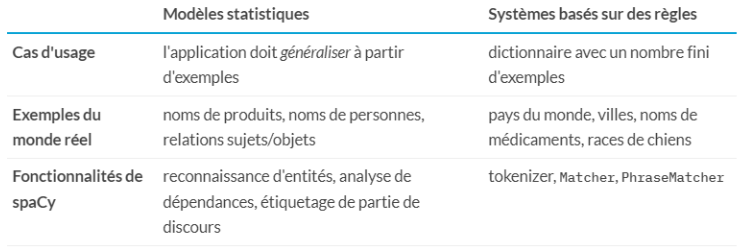

### Recap: Rule-based Matching

Quick recap of Part1

- The matcher is initialized with the shared vocabulary, usually `nlp.vocab`.

- Patterns are lists of dictionaries, and each dictionary describes one token and its attributes.
- Patterns can be added to the matcher using the `matcher.add` method.

- Operators let you specify how often to match a token. For example, "+" will match one or more times.

- Calling the matcher on a doc object will return a list of the matches.
- Each match is a tuple consisting of an ID, and the start and end token index in the document.

In [ ]:
# Initialize with the shared vocab
from spacy.matcher import Matcher
matcher = Matcher(nlp.vocab)

# Patterns are lists of dictionaries describing the tokens
pattern = [{"LEMMA": "love", "POS": "VERB"}, {"LOWER": "cats"}]
matcher.add("LOVE_CATS", [pattern])

# Operators can specify how often a token should be matched
pattern = [{"TEXT": "very", "OP": "+"}, {"TEXT": "happy"}]
matcher.add("VERY_HAPPY", [pattern])

# Calling matcher on doc returns list of (match_id, start, end) tuples
doc = nlp("I love cats and I'm very very happy")
matches = matcher(doc)

### Adding statistical predictions

Here's an example of a matcher rule for "golden retriever".

If we iterate over the matches returned by the matcher, we can get the match ID and the start and end index of the matched span. We can then find out more about it. `Span` objects give us access to the original document and all other token attributes and linguistic features predicted by a model.

For example, we can get the span's root token. If the span consists of more than one token, this will be the token that decides the category of the phrase. For example, the root of "Golden Retriever" is "Retriever". We can also find the head token of the root. This is the syntactic "parent" that governs the phrase, in this case, the verb "have".

Finally, we can look at the previous token and its attributes. In this case, it's a determiner, the article "a".

In [ ]:
matcher = Matcher(nlp.vocab)
matcher.add("DOG", [[{"LOWER": "golden"}, {"LOWER": "retriever"}]])
doc = nlp("I have a Golden Retriever")

for match_id, start, end in matcher(doc):
    span = doc[start:end]
    print("Matched span:", span.text)
    # Get the span's root token and root head token
    print("Root token:", span.root.text)
    print("Root head token:", span.root.head.text)
    # Get the previous token and its POS tag
    print("Previous token:", doc[start - 1].text, doc[start - 1].pos_)

### Efficient phrase matching

The phrase matcher is another helpful tool to find sequences of words in your data.

It performs a keyword search on the document, but instead of only finding strings, it gives you direct access to the tokens in context.

It takes `Doc` objects as patterns.

It's also really fast.

This makes it very useful for matching large dictionaries and word lists on large volumes of text.


- `PhraseMatcher` like regular expressions or keyword search – but with access to the tokens!
- Takes `Doc` object as patterns
- More efficient and faster than the `Matcher`
- Great for matching large word lists

Here's an example.

The phrase matcher can be imported from `spacy.matcher` and follows the same API as the regular matcher.

Instead of a list of dictionaries, we pass in a `Doc` object as the pattern.

We can then iterate over the matches in the text, which gives us the match ID, and the start and end of the match. This lets us create a `Span` object for the matched tokens "Golden Retriever" to analyze it in context.


In [ ]:
from spacy.matcher import PhraseMatcher

matcher = PhraseMatcher(nlp.vocab)

pattern = nlp("Golden Retriever")
matcher.add("DOG", [pattern])
doc = nlp("I have a Golden Retriever")

# Iterate over the matches
for match_id, start, end in matcher(doc):
    # Get the matched span
    span = doc[start:end]
    print("Matched span:", span.text)

## K. Débugguer les motifs

Both patterns in this exercise contain mistakes and won’t match as expected. Can you fix them? If you get stuck, try printing the tokens in the `doc` to see how the text will be split and adjust the pattern so that each dictionary represents one token.

- Edit `pattern1` so that it correctly matches all case-insensitive mentions of `"Amazon"` plus a title-cased proper noun.
- Edit `pattern2` so that it correctly matches all case-insensitive mentions of `"ad-free"`, plus the following noun.

In [ ]:
import spacy
from spacy.matcher import Matcher

nlp = spacy.load("en_core_web_sm")
doc = nlp(
    "Twitch Prime, the perks program for Amazon Prime members offering free "
    "loot, games and other benefits, is ditching one of its best features: "
    "ad-free viewing. According to an email sent out to Amazon Prime members "
    "today, ad-free viewing will no longer be included as a part of Twitch "
    "Prime for new members, beginning on September 14. However, members with "
    "existing annual subscriptions will be able to continue to enjoy ad-free "
    "viewing until their subscription comes up for renewal. Those with "
    "monthly subscriptions will have access to ad-free viewing until October 15."
)

# Create the match patterns
pattern1 = [{"LOWER": "Amazon"}, {"IS_TITLE": True, "POS": "PROPN"}]
pattern2 = [{"LOWER": "ad-free"}, {"POS": "NOUN"}]

# Initialize the Matcher and add the patterns
matcher = Matcher(nlp.vocab)
matcher.add("PATTERN1", [pattern1])
matcher.add("PATTERN2", [pattern2])

# Iterate over the matches
for match_id, start, end in matcher(doc):
    # Print pattern string name and text of matched span
    print(doc.vocab.strings[match_id], doc[start:end].text)

## L. Efficient phrase matching

Sometimes it’s more efficient to match exact strings instead of writing patterns describing the individual tokens. This is especially true for finite categories of things – like all countries of the world. We already have a list of countries, so let’s use this as the basis of our information extraction script. A list of string names is available as the variable `COUNTRIES`.

- Import the `PhraseMatcher` and initialize it with the shared `vocab` as the variable `matcher`.
- Add the phrase patterns and call the matcher on the `doc`.

In [ ]:
import json
import spacy

with open("exercises/en/countries.json", encoding="utf8") as f:
    COUNTRIES = json.loads(f.read())

nlp = spacy.blank("en")
doc = nlp("Czech Republic may help Slovakia protect its airspace")

# Import the PhraseMatcher and initialize it
from spacy.____ import ____

matcher = ____(____)

# Create pattern Doc objects and add them to the matcher
# This is the faster version of: [nlp(country) for country in COUNTRIES]
patterns = list(nlp.pipe(COUNTRIES))
matcher.add("COUNTRY", patterns)

# Call the matcher on the test document and print the result
matches = ____(____)
print([doc[start:end] for match_id, start, end in matches])

## M. Extracting countries and relationships

In the previous exercise, you wrote a script using spaCy’s `PhraseMatcher` to find country names in text. Let’s use that country matcher on a longer text, analyze the syntax and update the document’s entities with the matched countries.

- Iterate over the matches and create a `Span` with the label `"GPE"` (geopolitical entity).
- Overwrite the entities in `doc.ents` and add the matched span.
- Get the matched span’s root head token.
- Print the text of the head token and the span.

In [ ]:
import spacy
from spacy.matcher import PhraseMatcher
from spacy.tokens import Span
import json

with open("exercises/en/countries.json", encoding="utf8") as f:
    COUNTRIES = json.loads(f.read())
with open("exercises/en/country_text.txt", encoding="utf8") as f:
    TEXT = f.read()

nlp = spacy.load("en_core_web_sm")
matcher = PhraseMatcher(nlp.vocab)
patterns = list(nlp.pipe(COUNTRIES))
matcher.add("COUNTRY", patterns)

# Create a doc and reset existing entities
doc = nlp(TEXT)
doc.ents = []

# Iterate over the matches
for match_id, start, end in matcher(doc):
    # Create a Span with the label for "GPE"
    span = ____(____, ____, ____, label=____)

    # Overwrite the doc.ents and add the span
    doc.ents = list(doc.ents) + [____]

    # Get the span's root head token
    span_root_head = ____.____.____
    # Print the text of the span root's head token and the span text
    print(span_root_head.____, "-->", span.text)

# Print the entities in the document
print([(ent.text, ent.label_) for ent in doc.ents if ent.label_ == "GPE"])